![Colegio Bourbaki](./Images/Bourbaki.png)

## Rudimentos de Machine Learning

### Regresión Lineal y Árboles de Decisión

### Contexto

Link del dataset: https://challengedata.ens.fr/participants/challenges/68/

El Institut Louis Bachelier (ILB) es una red de investigación patrocinada en Economía y Finanzas. Es una asociación según la definición de la ley de 1901 y se creó en 2008 a instancias del Tesoro y la Caisse des Dépôts et Consignations. A través de sus actividades, pretende implicar a académicos, autoridades públicas y empresas en proyectos de investigación, así como en eventos científicos y otros foros de intercambio. Las decenas de proyectos de investigación que acoge el ILBf se centran en cuatro transiciones sociales: medioambiental, digital, demográfica y financiera.

El ILB Datalab es un equipo de científicos de datos que trabajan junto a investigadores de la red ILB en proyectos de investigación aplicada para agentes públicos y privados de nuestro ecosistema económico y financiero. El ILB datalab ha recopilado recientemente una gran cantidad de datos inmobiliarios franceses y le gustaría realizar análisis y experimentos con ellos. Este reto es una oportunidad para hacerlo.

Objetivos del reto

El proyecto es una tarea de regresión que trata sobre la estimación del precio de los inmuebles. La estimación del precio de los inmuebles de viviendas es un tema bastante común, con una importante bibliografía sobre la estimación de precios basada en datos habituales como: ubicación, superficie, terreno, número de dormitorios, antigüedad del edificio... Las aproximaciones suelen ser suficientes para estimar el rango de precios, pero carecen de precisión. Sin embargo, pocos han trabajado para ver si la adición de fotos del bien aportaría información complementaria, permitiendo una estimación más precisa del precio.

Así pues, el objetivo es trabajar en la modelización de los precios inmobiliarios de la vivienda francesa a partir de los datos tabulares jerárquicos habituales y, unas pocas fotos (entre 1 y 6) para cada bien y ver si permite un mejor rendimiento que un modelo entrenado sin las fotos.

Valoraremos la interpretabilidad de los resultados para comprender mejor las características valiosas.

**IMPORTANTE:** En nuestro caso, no utilizaremos las imágenes. Esta notebook solo será un análisis exploratorio al problema

Descripción de los datos

La salida y representa los precios inmobiliarios de vivienda ofrecidos de los activos franceses en euros.

La entrada X contiene

* un identificador del anuncio
* el tipo de propiedad (casa, apartamento, condominio, mansión...)
* la ubicación (latitud aproximada, longitud aproximada, ciudad, código postal, exposición, piso cuando proceda...)
* el tamaño (superficie habitable y superficie del terreno cuando proceda),
* el número de habitaciones, dormitorios, baños...
* indicadores de eficiencia energética (energía y emisiones de gases de efecto invernadero)
* el número de fotos adjuntas al anuncio
* indicadores de si hay sótano, balcón, aire acondicionado...


Junto con estos datos tabulares, proporcionamos una carpeta comprimida que contiene de 1 a 6 fotos por anuncio (véanse los archivos suplementarios). Para cada anuncio del conjunto de datos tabulares, las fotos correspondientes se encuentran en la carpeta denominada "ann_XX", donde XX corresponde al identificador del anuncio.

Los datos tabulares no se han preparado con anterioridad. Nos gustaría destacar el hecho de que las imágenes pueden mejorar o corregir algunas características tabulares. El diccionario de datos detallado está disponible más abajo:

| Name (Type) | Description | Compulsory field on web platform |
|-------------|-------------|----------------------------------|
| `id_annonce` (str) | unique listing identification code | True |
| `price` (float) | price at which the property is listed | True |
| `property_type` (str) | property type (house, apartment…) | True |
| `approximate_latitude` (float) | latitude of the property with a small random gaussian added for the sake of anonymisation | False |
| `approximate_longitude` (float) | longitude of the property with a small random gaussian added for the sake of anonymisation | False |
| `city` (str) | city in which the property is located | True |
| `postal_code` (int) | postal code of the property | True |
| `size` (float) | living area of the property | False |
| `floor` (float) | floor at which the property is located | False |
| `land_size` (float) | size of the land that comes with the property | False |
| `energy_performance_value` (float) | energy performance value in kWh/m²/year | False |
| `energy_performance_category` (char) | energy performance category as defined by the French DPE regulation: [DPE](https://www.ecologie.gouv.fr/diagnostic-performance-energetique-dpe) | False |
| `ghg_value` (float) | greenhouse gas emission performance value in kg eqCO2/m² | False |
| `ghg_category` (char) | greenhouse gas emission performance category as defined by the French DPE regulation: [DPE](https://www.ecologie.gouv.fr/diagnostic-performance-energetique-dpe) | False |
| `exposition` (str) | direction the property is facing | False |
| `nb_rooms` (int) | number of rooms in the property | False |
| `nb_bedrooms` (int) | number of bedrooms in the property | False |
| `nb_bathrooms` (int) | number of bathrooms in the property | False |
| `nb_parking_places` (int) | number of parking places coming with the property | False |
| `nb_boxes` (int) | number of boxes coming with the property | False |
| `nb_photos` (int) | number of photos posted on the listing | False |
| `has_a_balcony` (binary) | indicator whether there is a balcony in the property (1 if true, 0 if false) | False |
| `nb_terraces` (binary) | number of terraces in the property | False |
| `has_a_cellar` (binary) | indicator whether there is a cellar in the property (1 if true, 0 if false) | False |
| `has_a_garage` (binary) | indicator whether there is a garage in the property (1 if true, 0 if false) | False |
| `has_air_conditioning` (binary) | indicator whether there is air conditioning in the property (1 if true, 0 if false) | False |
| `last_floor` (binary) | indicator whether the property is located on the top floor (1 if true, 0 if false) | False |
| `upper_floors` (binary) | indicator whether the property is located in the upper floors (1 if true, 0 if false) | False |


El tamaño global de la muestra es de unos 50.000 listados y 300.000 fotos. El conjunto de datos tabulares ocupa unos 10 MB en formato CSV y las imágenes, unos 30 GB.

Realizamos una división del 80%/20% entre entrenamiento y prueba, lo que nos da ~40.000 listados para el entrenamiento y ~10.000 para la prueba.

### Librerias

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


# Utils
import os
from IPython.display import Image, display
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

Vamos a ver algunas de las imágenes:

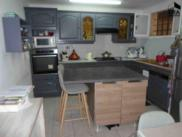

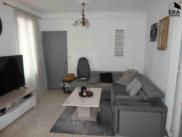

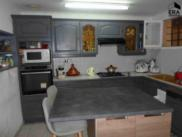

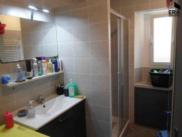

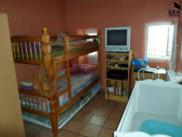

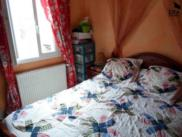

In [2]:
# Set the path to your folder containing the images
folder_path = './Data/reduced_images/train/ann_6774630'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Loop through all files and display them if they are images
for image_file in image_files:
    display(Image(filename=os.path.join(folder_path, image_file)))

### Carga de Datos

Vamos a leer los datos:

In [3]:
df_train = pd.read_csv('./Data/X_train_J01Z4CN.csv')

In [4]:
df_ytrain = pd.read_csv('./Data/y_train_OXxrJt1.csv')

In [5]:
df_train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_train.tail()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37367,35748883,maison,46.032306,1.966711,le-donzeil,23480,90.0,NaN,600.0,NaN,...,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

In [8]:
df_train.columns

Index(['id_annonce', 'property_type', 'approximate_latitude',
       'approximate_longitude', 'city', 'postal_code', 'size', 'floor',
       'land_size', 'energy_performance_value', 'energy_performance_category',
       'ghg_value', 'ghg_category', 'exposition', 'nb_rooms', 'nb_bedrooms',
       'nb_bathrooms', 'nb_parking_places', 'nb_boxes', 'nb_photos',
       'has_a_balcony', 'nb_terraces', 'has_a_cellar', 'has_a_garage',
       'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')

In [9]:
df_ytrain.head()

,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


In [10]:
df_ytrain.tail()

,id_annonce,price
37363,35881571,190000.0
37364,35890109,399000.0
37365,36010245,328000.0
37366,35864579,463000.0
37367,35748883,69930.0


In [11]:
df_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_annonce  37368 non-null  int64  
 1   price       37368 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 584.0 KB


In [12]:
df_ytrain.columns

Index(['id_annonce', 'price'], dtype='object')

### Analisis Descriptivo

In [13]:
df_train.describe()

,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,3.736800e+04,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,...,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,3.569033e+07,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,...,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,1.468073e+06,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,...,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,6.774630e+06,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.580825e+07,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.587096e+07,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.601119e+07,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,...,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.609881e+07,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,...,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Veamos los valores nulos:

In [14]:
df_train.isnull().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                             512
floor                          27625
land_size                      21787
energy_performance_value       18300
energy_performance_category    18300
ghg_value                      18838
ghg_category                   18838
exposition                     28274
nb_rooms                        1566
nb_bedrooms                     2733
nb_bathrooms                   13273
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
d

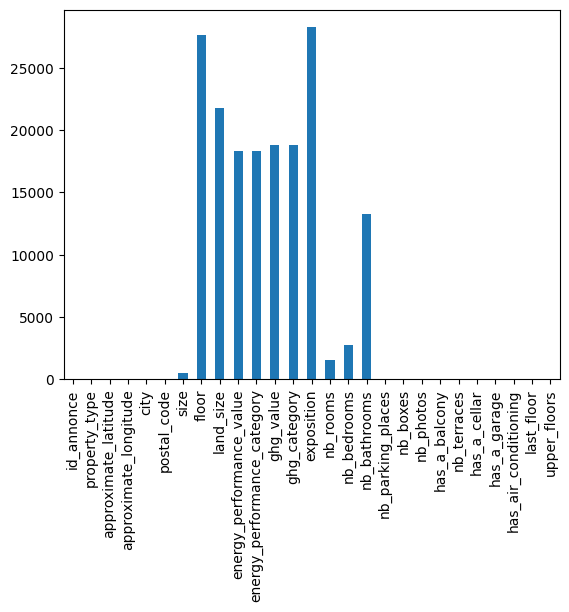

In [15]:
df_train.isnull().sum().plot(kind='bar')
plt.show()

**Resumen estadístico:**

* El conjunto de datos contiene 37.368 filas con diversos atributos relacionados con anuncios inmobiliarios.
* El tamaño de las propiedades varía significativamente, con una media de aproximadamente 1089 metros cuadrados, pero esto incluye algunos valores atípicos muy grandes, ya que el tamaño máximo es de 411.311 metros cuadrados.
* A menudo falta el atributo suelo (faltan 27.625 valores), lo que indica que muchos listados no especifican este detalle, posiblemente por tratarse de casas en lugar de apartamentos.
* land_size también varía mucho, con una media de unos 3.995 metros cuadrados, lo que indica la presencia de algunas grandes urbanizaciones.
* El precio de las propiedades oscila entre 24.465 y 2.299.000, con un precio medio de aproximadamente 343.221.

**Valores Missing:**

* Varias columnas tienen un número significativo de valores perdidos, en particular suelo, tamaño_terreno, valor_rendimiento_energético, categoría_rendimiento_energético, valor_ghg, categoría_ghg, exposición y nb_baños.
* Columnas como size, nb_rooms y nb_bedrooms también tienen valores que faltan, pero en menor medida.

Vamos a hacer un merge de los dataframe para combinar características con los precios:

In [16]:
df = pd.merge(df_train, df_ytrain, on='id_annonce', how='inner')

### Distribuciones de los datos

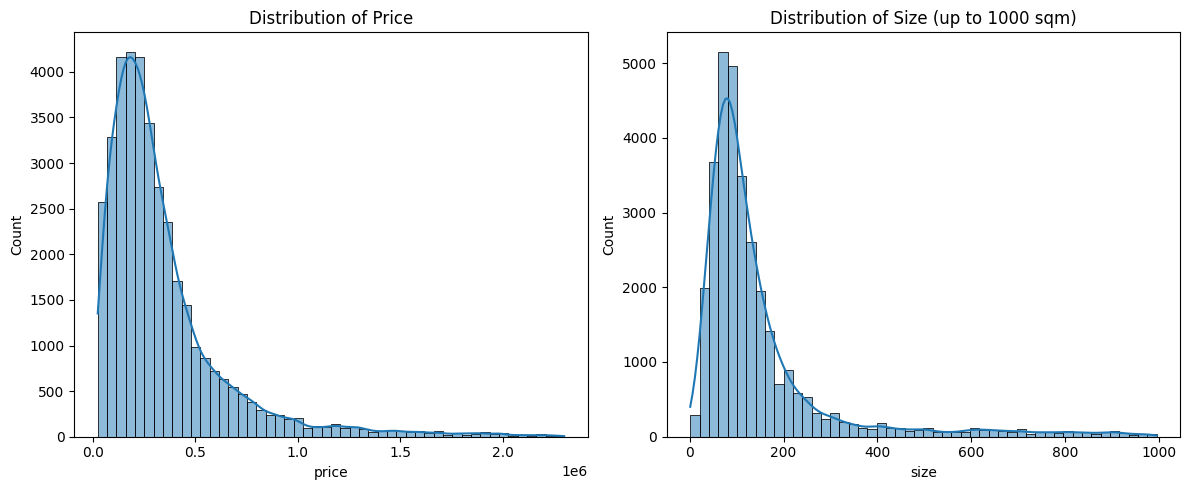

In [17]:
# Distribution Analysis for 'price' and 'size'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(df[df['size'] < 1000]['size'], bins=50, kde=True)  # Limiting size to filter extreme outliers for visualization
plt.title('Distribution of Size (up to 1000 sqm)')

plt.tight_layout()
plt.show()

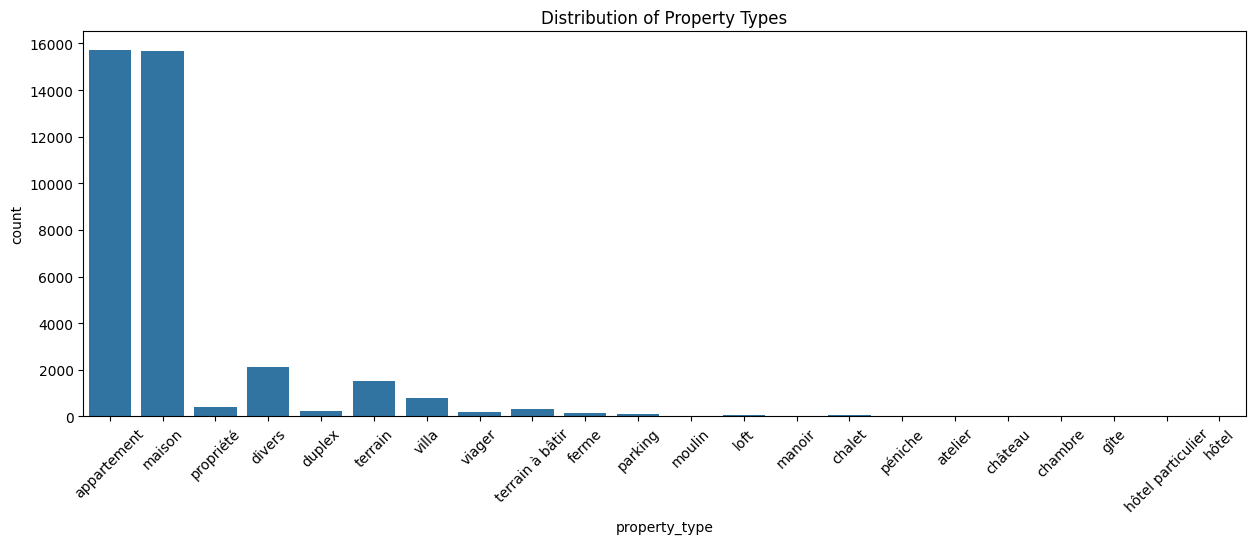

In [18]:
# Categorical Data Analysis: Property Type Distribution
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='property_type')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Average Price by City (Top 10 cities for demonstration)
avg_price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

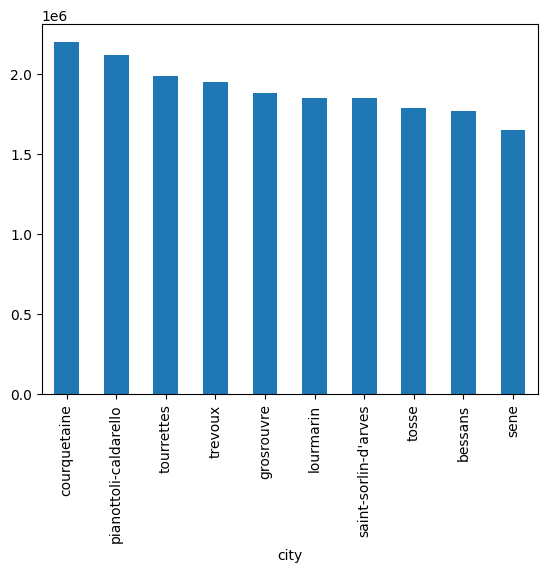

In [20]:
avg_price_by_city.plot(kind='bar')
plt.show()

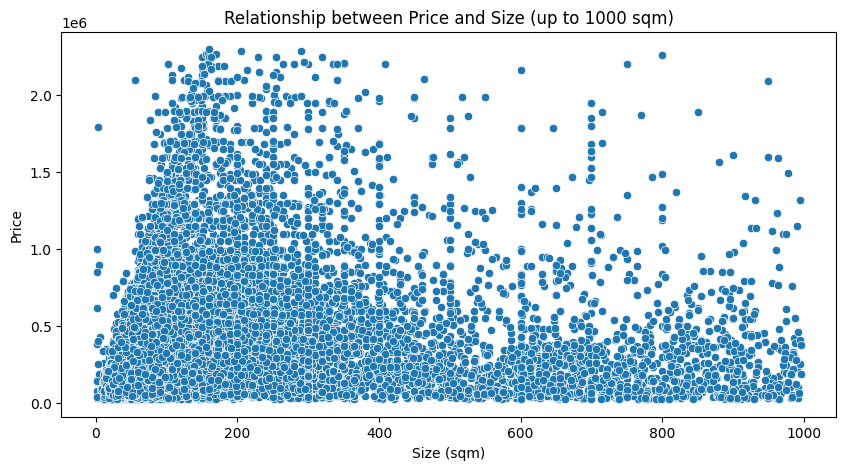

In [21]:
# Numerical Variables Analysis: Relationship between Price and Size
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['size'] < 1000], x='size', y='price')  # Limiting to realistic property sizes for visualization
plt.title('Relationship between Price and Size (up to 1000 sqm)')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.show()

In [22]:
# Categorical Variables Analysis: Property Type Distribution and Average Price
property_type_avg_price = df.groupby('property_type')['price'].mean().sort_values(ascending=False)

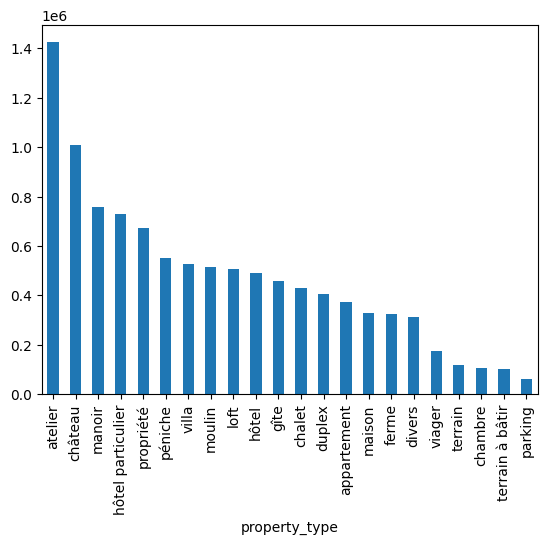

In [23]:
property_type_avg_price.plot(kind='bar')
plt.show()

Vamos a deshacernos de ciertas variables categóricas:

In [24]:
columns_to_drop = ['city', 'ghg_category', 'exposition', 'energy_performance_category']

In [25]:
df_drop = df.drop(columns_to_drop, axis=1)

Vamos a pasar a númericas la variable categórica property_type:

In [26]:
df_drop = pd.get_dummies(df_drop)

In [27]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_annonce                       37368 non-null  int64  
 1   approximate_latitude             37368 non-null  float64
 2   approximate_longitude            37368 non-null  float64
 3   postal_code                      37368 non-null  int64  
 4   size                             36856 non-null  float64
 5   floor                            9743 non-null   float64
 6   land_size                        15581 non-null  float64
 7   energy_performance_value         19068 non-null  float64
 8   ghg_value                        18530 non-null  float64
 9   nb_rooms                         35802 non-null  float64
 10  nb_bedrooms                      34635 non-null  float64
 11  nb_bathrooms                     24095 non-null  float64
 12  nb_parking_places 

In [28]:
df_drop.head()

,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,...,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
0,35996577,43.643880,7.117183,6270,63.0,NaN,NaN,NaN,NaN,3.0,...,False,False,False,False,False,False,False,False,False,False
1,35811033,45.695757,4.895610,69200,90.0,3.0,NaN,223.0,52.0,5.0,...,False,False,False,False,False,False,False,False,False,False
2,35731841,47.966791,-1.220451,35130,61.0,NaN,370.0,NaN,NaN,2.0,...,True,False,False,False,False,False,False,False,False,False
3,35886765,47.289292,-1.878805,44360,142.0,NaN,764.0,217.0,44.0,4.0,...,True,False,False,False,False,False,False,False,False,False
4,35781137,45.718992,4.844234,69007,88.0,3.0,NaN,NaN,NaN,4.0,...,False,False,False,False,False,False,False,False,False,False


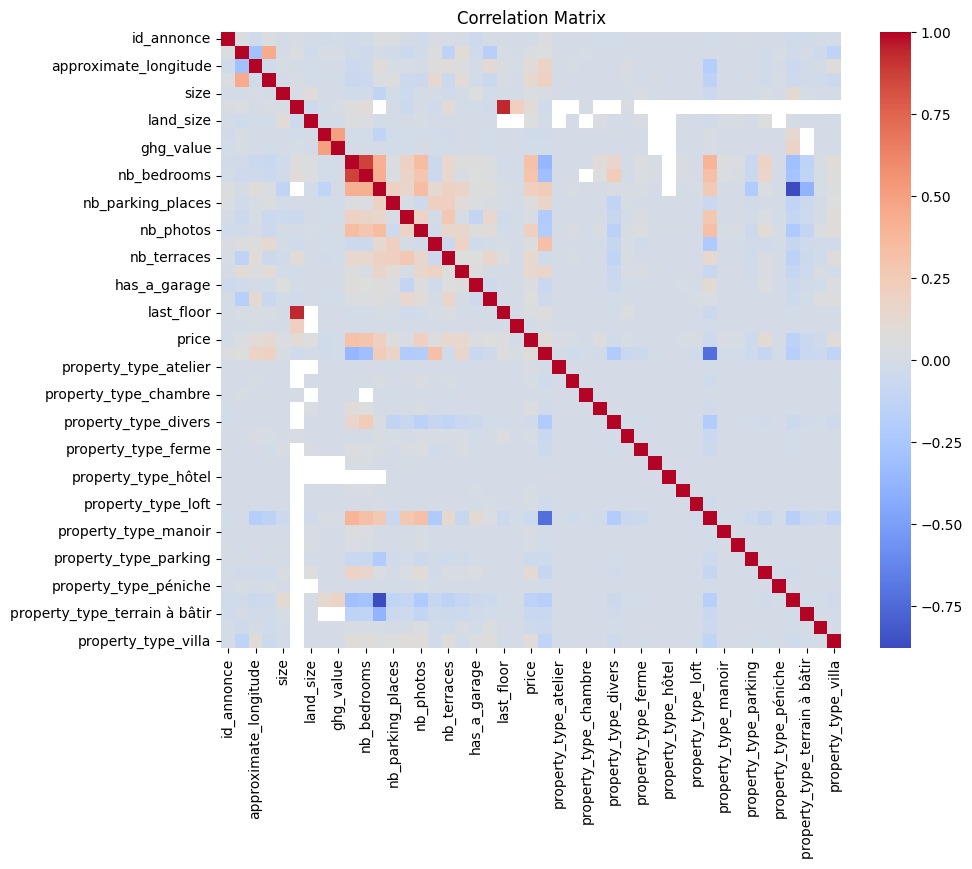

In [29]:
# Correlation Analysis
correlation_matrix = df_drop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Detailed Correlation Analysis focusing on Price
price_correlation = df_drop.corr()['price'].sort_values(ascending=False)

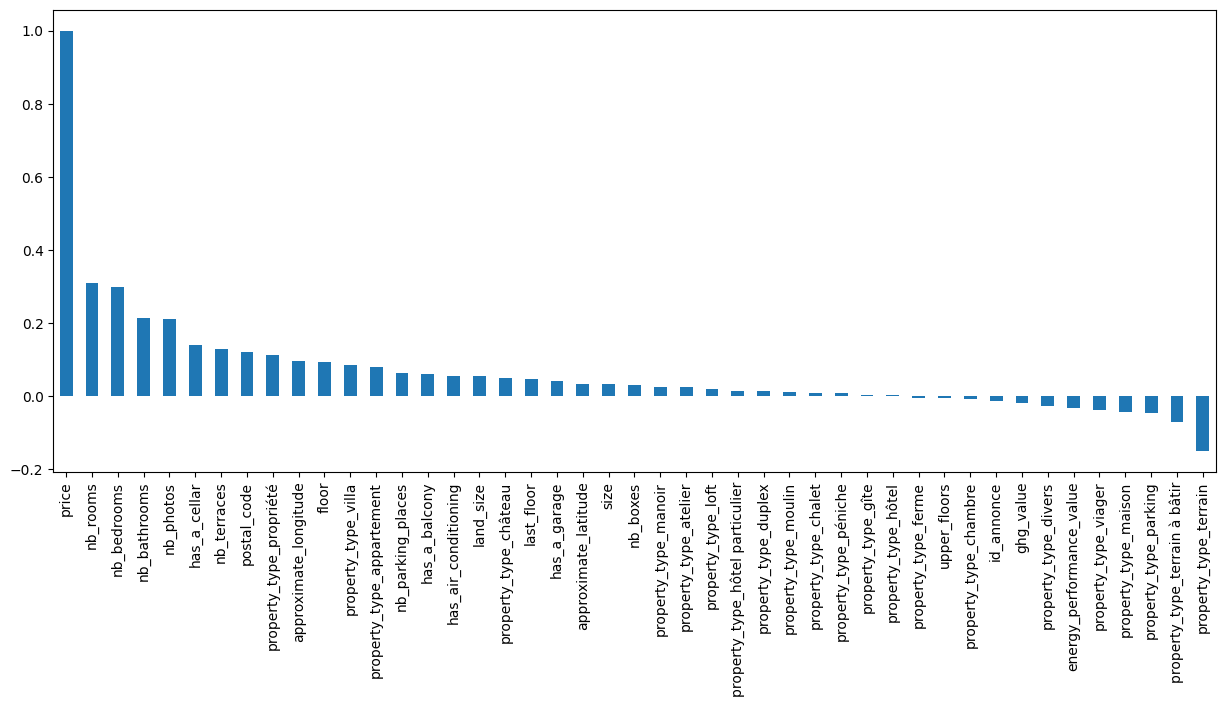

In [31]:
price_correlation.plot(kind='bar', figsize=(15, 6))
plt.show()

Vamos a chequear la cantidad de variables que hay en las características categóricas:

In [32]:
#Check the value counts for all object type columns
df.select_dtypes(include=['object']).nunique()

property_type                    22
city                           8643
energy_performance_category       7
ghg_category                      7
exposition                       12
dtype: int64

In [33]:
#show the value counts for each column
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print()

property_type
appartement          15733
maison               15675
divers                2137
terrain               1534
villa                  781
propriété              408
terrain à bâtir        298
duplex                 220
viager                 177
ferme                  130
parking                 96
loft                    54
chalet                  48
château                 21
moulin                  17
manoir                  15
péniche                  8
hôtel particulier        6
chambre                  4
gîte                     3
atelier                  2
hôtel                    1
Name: count, dtype: int64

city
toulouse          453
montpellier       375
paris-18eme       242
paris-16eme       237
nice              232
                 ... 
cerences            1
fromentieres        1
loye-sur-arnon      1
castelculier        1
le-donzeil          1
Name: count, Length: 8643, dtype: int64

energy_performance_category
D    7023
C    4113
E    3813
B    2138
F    1049

Vamos a chequear nuevamente las columnas:

In [34]:
df.columns

Index(['id_annonce', 'property_type', 'approximate_latitude',
       'approximate_longitude', 'city', 'postal_code', 'size', 'floor',
       'land_size', 'energy_performance_value', 'energy_performance_category',
       'ghg_value', 'ghg_category', 'exposition', 'nb_rooms', 'nb_bedrooms',
       'nb_bathrooms', 'nb_parking_places', 'nb_boxes', 'nb_photos',
       'has_a_balcony', 'nb_terraces', 'has_a_cellar', 'has_a_garage',
       'has_air_conditioning', 'last_floor', 'upper_floors', 'price'],
      dtype='object')

Podemos visualizar que el las columnas id_annonce, city, postal_code y nb_photos pueden ser retiradas en un principio ya que no aportarian valor. La ciudad puede ser calculadada con la latitud y longitud aproximada. Las fotos no nos interesan en este problema. La categoria de performance energetico hace referencia al valor numérico de performance, entonces sería redundante. Lo mismo para ghg_category.

In [35]:
columns_to_drop = ['id_annonce', 'city', 'postal_code', 'nb_photos', 'energy_performance_category', 'ghg_category']

In [36]:
df_lr = df.drop(columns_to_drop, axis=1)

In [37]:
df_lr = pd.get_dummies(df_lr)

In [38]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   approximate_latitude             37368 non-null  float64
 1   approximate_longitude            37368 non-null  float64
 2   size                             36856 non-null  float64
 3   floor                            9743 non-null   float64
 4   land_size                        15581 non-null  float64
 5   energy_performance_value         19068 non-null  float64
 6   ghg_value                        18530 non-null  float64
 7   nb_rooms                         35802 non-null  float64
 8   nb_bedrooms                      34635 non-null  float64
 9   nb_bathrooms                     24095 non-null  float64
 10  nb_parking_places                37368 non-null  float64
 11  nb_boxes                         37368 non-null  float64
 12  has_a_balcony     

In [39]:
def high_correlation_features(dataframe, threshold=0.95):
    """
    Identifies and returns pairs of highly correlated features from the given dataframe.

    Parameters:
    - dataframe: A pandas DataFrame containing the dataset.
    - threshold: A float representing the correlation threshold to identify high correlations.

    Returns:
    - A DataFrame with pairs of features that have a correlation coefficient above the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with a correlation above the threshold
    # Note: The matrix is symmetric, so we need to filter out one side to avoid duplicates
    high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .reset_index())
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corr_pairs = high_corr_pairs.loc[high_corr_pairs['Correlation'] > threshold, :]

    return high_corr_pairs

In [40]:
correlated_features = high_correlation_features(df_lr)

In [41]:
correlated_features

,Feature 1,Feature 2,Correlation


Vemos que no hay fuerte correlación en las columnas.

In [42]:
# Identifying numerical columns in the dataset (excluding one-hot encoded columns)
numerical_cols = ['size', 'floor', 'land_size', 'energy_performance_value', 'ghg_value', 'nb_rooms', 'nb_bedrooms',
                  'nb_bathrooms', 'nb_parking_places', 'nb_boxes']

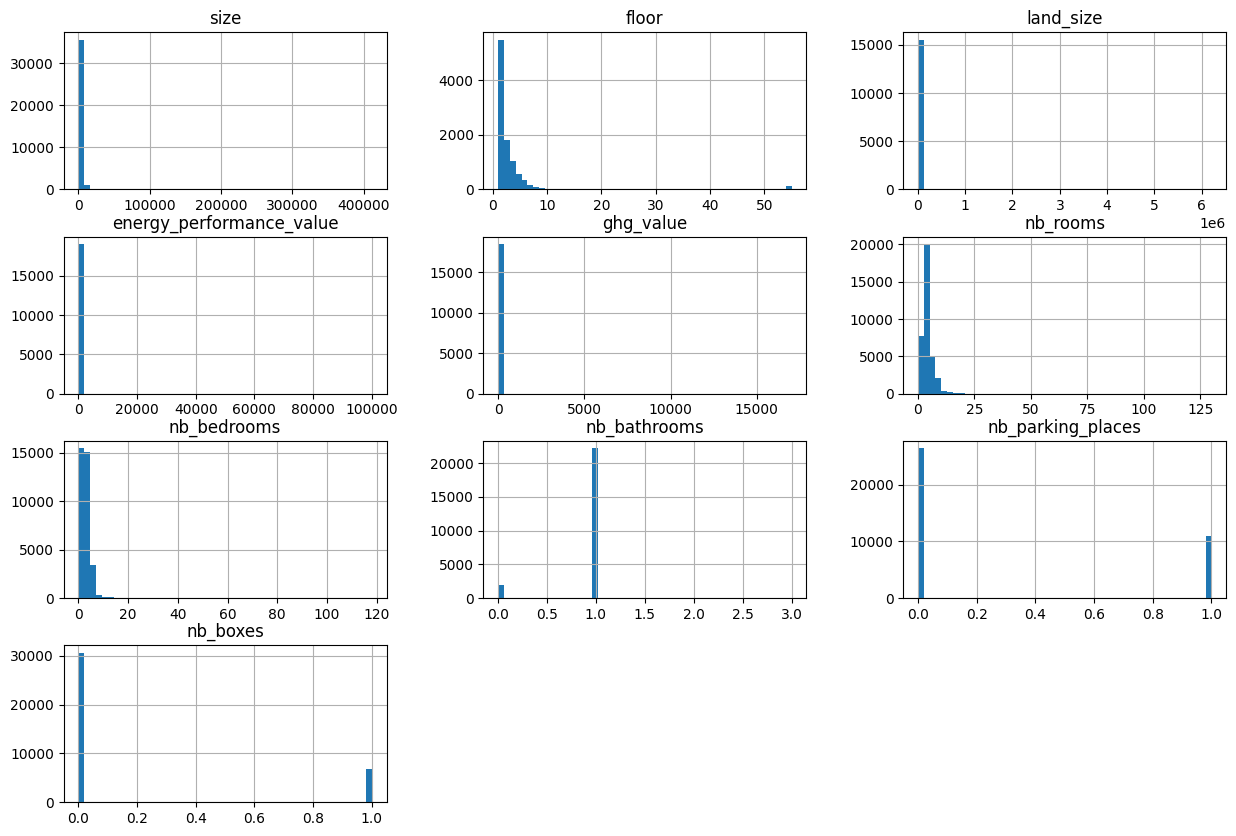

In [43]:
#plot the distributions of all numerical columns
df[numerical_cols].hist(bins=50, figsize=(15, 10), sharex=False, sharey=False)
plt.show()

Veamos qué podemos hacer con los valores nulos.

In [44]:
df_lr.isnull().sum()

approximate_latitude                   0
approximate_longitude                  0
size                                 512
floor                              27625
land_size                          21787
energy_performance_value           18300
ghg_value                          18838
nb_rooms                            1566
nb_bedrooms                         2733
nb_bathrooms                       13273
nb_parking_places                      0
nb_boxes                               0
has_a_balcony                          0
nb_terraces                            0
has_a_cellar                           0
has_a_garage                           0
has_air_conditioning                   0
last_floor                             0
upper_floors                           0
price                                  0
property_type_appartement              0
property_type_atelier                  0
property_type_chalet                   0
property_type_chambre                  0
property_type_ch

In [45]:
# Imputing missing values with their median
imputer = SimpleImputer(strategy='median')
df_lr[numerical_cols] = imputer.fit_transform(df_lr[numerical_cols])

In [46]:
df_lr.isnull().sum()

approximate_latitude               0
approximate_longitude              0
size                               0
floor                              0
land_size                          0
energy_performance_value           0
ghg_value                          0
nb_rooms                           0
nb_bedrooms                        0
nb_bathrooms                       0
nb_parking_places                  0
nb_boxes                           0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
price                              0
property_type_appartement          0
property_type_atelier              0
property_type_chalet               0
property_type_chambre              0
property_type_château              0
property_type_divers               0
property_type_duplex               0
p

In [47]:
# Detailed Correlation Analysis focusing on Price
price_correlation = df_lr.corr()['price'].sort_values(ascending=False)

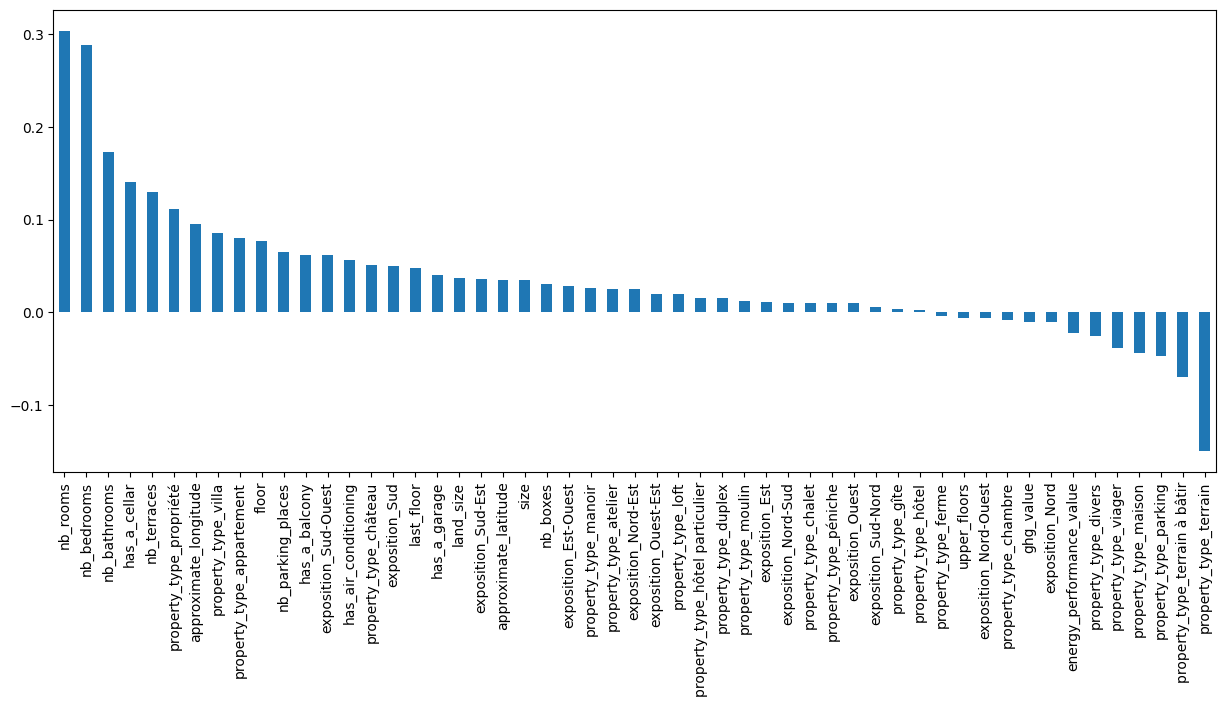

In [48]:
price_correlation.drop('price').plot(kind='bar', figsize=(15, 6))
plt.show()

### Regresión Lineal

In [49]:
#Normalizacion
scaler = MinMaxScaler()
columns = df_lr.columns
df_lr = scaler.fit_transform(df_lr)

In [50]:
df_lr = pd.DataFrame(df_lr, columns=columns)

In [51]:
# Splitting the dataset into features (X) and target (y)
X = df_lr.drop(['price'], axis=1)
y = df_lr['price']

In [52]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Display the shape of the training and testing sets to confirm successful split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29894, 53), (7474, 53), (29894,), (7474,))

In [54]:
# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

# Evaluating the Linear Regression model
mse_linear_train = mean_squared_error(y_train, y_pred_train_linear)
rmse_linear_train = root_mean_squared_error(y_train, y_pred_train_linear)
r2_linear_train = r2_score(y_train, y_pred_train_linear)
mse_linear_test = mean_squared_error(y_test, y_pred_test_linear)
rmse_linear_test = root_mean_squared_error(y_test, y_pred_test_linear)
r2_linear_test= r2_score(y_test, y_pred_test_linear)

In [55]:
print(f'MSE Train LR: {mse_linear_train}, RMSE Train LR: {rmse_linear_train}, R2 Train LR: {r2_linear_train}')

MSE Train LR: 0.014872697211785517, RMSE Train LR: 0.12195366829983229, R2 Train LR: 0.1967980113817447


In [56]:
print(f'MSE Test LR: {mse_linear_test}, RMSE Test LR: {rmse_linear_test}, R2 Test LR: {r2_linear_test}')

MSE Test LR: 0.015366972637952937, RMSE Test LR: 0.123963594002243, R2 Test LR: 0.15360578291099924


In [57]:
cross_val_score(linear_model, X, y, cv=10, verbose=1, scoring='neg_root_mean_squared_error')

array([-1.24798808e-01, -1.19649992e-01, -1.23487198e-01, -1.30712394e-01,
       -1.35137803e-01, -4.36999660e+09, -1.19152724e-01, -1.14856994e-01,
       -1.20566617e-01, -1.25486466e-01])

### Arbol de decisión regresivo

In [58]:
# Training the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_train_tree = linear_model.predict(X_train)
y_pred_test_tree = linear_model.predict(X_test)

# Evaluating the Decision Tree model
mse_tree_train = mean_squared_error(y_train, y_pred_train_tree)
rmse_tree_train = root_mean_squared_error(y_train, y_pred_train_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_test_tree)
rmse_tree_test = root_mean_squared_error(y_test, y_pred_test_tree)

In [59]:
print(f'MSE Train DT: {mse_tree_train}, RMSE Train DT: {rmse_tree_train}')

MSE Train DT: 0.014872697211785517, RMSE Train DT: 0.12195366829983229


In [60]:
print(f'MSE Test DT: {mse_tree_test}, RMSE Test DT: {rmse_tree_test}')

MSE Test DT: 0.015366972637952937, RMSE Test DT: 0.123963594002243


In [61]:
cross_val_score(tree_model, X, y, cv=10, verbose=1, scoring='neg_root_mean_squared_error')

array([-0.09609236, -0.0969797 , -0.09621156, -0.09621407, -0.09476139,
       -0.09452545, -0.09267905, -0.08939078, -0.0909789 , -0.09525715])

In [62]:
pd.DataFrame({'Train': ['Linear Regression', 'Decision Tree'], 'MSE': [mse_linear_train, mse_tree_train], 'RMSE': [rmse_linear_train, rmse_tree_train], 'R2': [r2_linear_train, '-']})

,Train,MSE,RMSE,R2
0,Linear Regression,0.014873,0.121954,0.196798
1,Decision Tree,0.014873,0.121954,-


In [63]:
pd.DataFrame({'Test': ['Linear Regression', 'Decision Tree'], 'MSE': [mse_linear_test, mse_tree_test], 'RMSE': [rmse_linear_test, rmse_tree_test], 'R2': [r2_linear_test, '-']})

,Test,MSE,RMSE,R2
0,Linear Regression,0.015367,0.123964,0.153606
1,Decision Tree,0.015367,0.123964,-


In [64]:
# Calculating errors
errors_linear_train = y_train - y_pred_train_linear
errors_tree_train = y_train - y_pred_train_tree
errors_linear_test = y_test - y_pred_test_linear
errors_tree_test = y_test - y_pred_test_linear

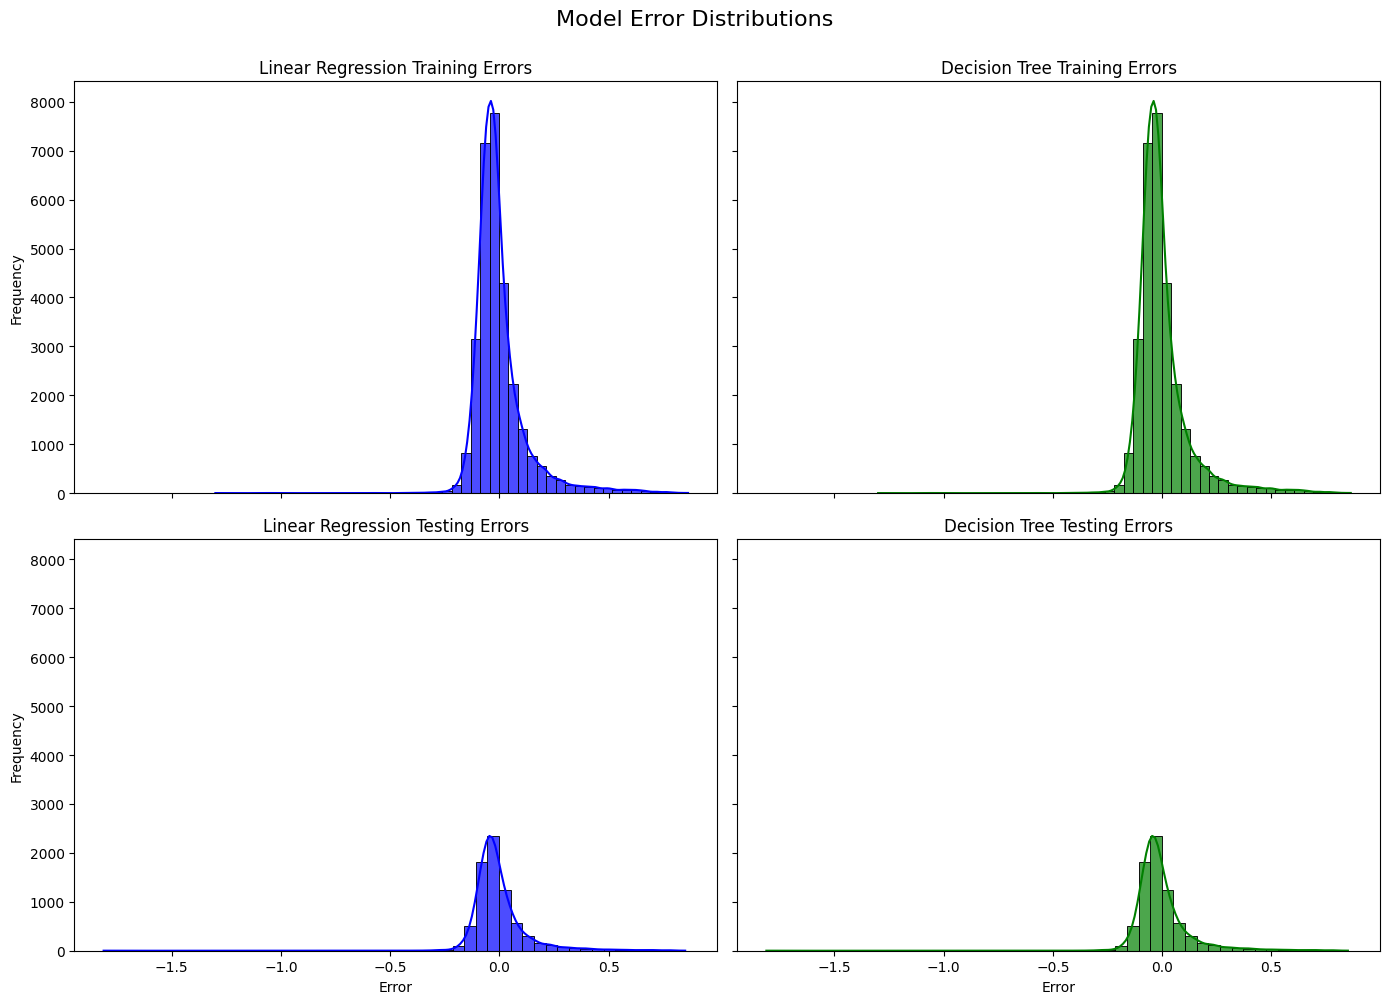

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

sns.histplot(errors_linear_train, bins=50, color='blue', edgecolor='black', alpha=0.7, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Linear Regression Training Errors')
axs[0, 0].set_xlabel('Error')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(errors_tree_train, bins=50, color='green', edgecolor='black', alpha=0.7, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree Training Errors')
axs[0, 1].set_xlabel('Error')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(errors_linear_test, bins=50, color='blue', edgecolor='black', alpha=0.7, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Linear Regression Testing Errors')
axs[1, 0].set_xlabel('Error')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(errors_tree_test, bins=50, color='green', edgecolor='black', alpha=0.7, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Decision Tree Testing Errors')
axs[1, 1].set_xlabel('Error')
axs[1, 1].set_ylabel('Frequency')

plt.suptitle('Model Error Distributions', fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Preguntas

**Comprensión Básica**

1) ¿Qué es la Regresión Lineal
2) ¿Qué son los Árboles de Decisión?
3) ¿Cómo predice resultados la Regresión Lineal?
4) ¿Cuál es la diferencia entre la Regresión Lineal y los Árboles de Decisión?

**Comprensión Intermedia**

5) ¿Qué es el sobreajuste y cómo puede afectar el rendimiento de la Regresión Lineal y los Árboles de Decisión?
6) ¿Cómo evalúas el rendimiento de un modelo de Regresión Lineal?
7) ¿Pueden los Árboles de Decisión manejar datos numéricos y categóricos? Explica cómo.

**Comprensión Avanzada**

8) Discute cómo prevenirías el sobreajuste en un modelo de Árbol de Decisión.
9) Explica el concepto de "importancia de características" en el contexto de los Árboles de Decisión.
10) En la Regresión Lineal, ¿cómo interpretas los coeficientes de las características?

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)